In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [2]:
hr=pd.read_csv("C:/Users/pal/Desktop/projects/project_7/HR-Employee-Attrition.csv")

In [3]:
def show_all(df, nrow=None, ncol=None):
    with pd.option_context('display.max_columns', ncol):
        display(df)
show_all(hr.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
hr.shape

(1470, 35)

In [5]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

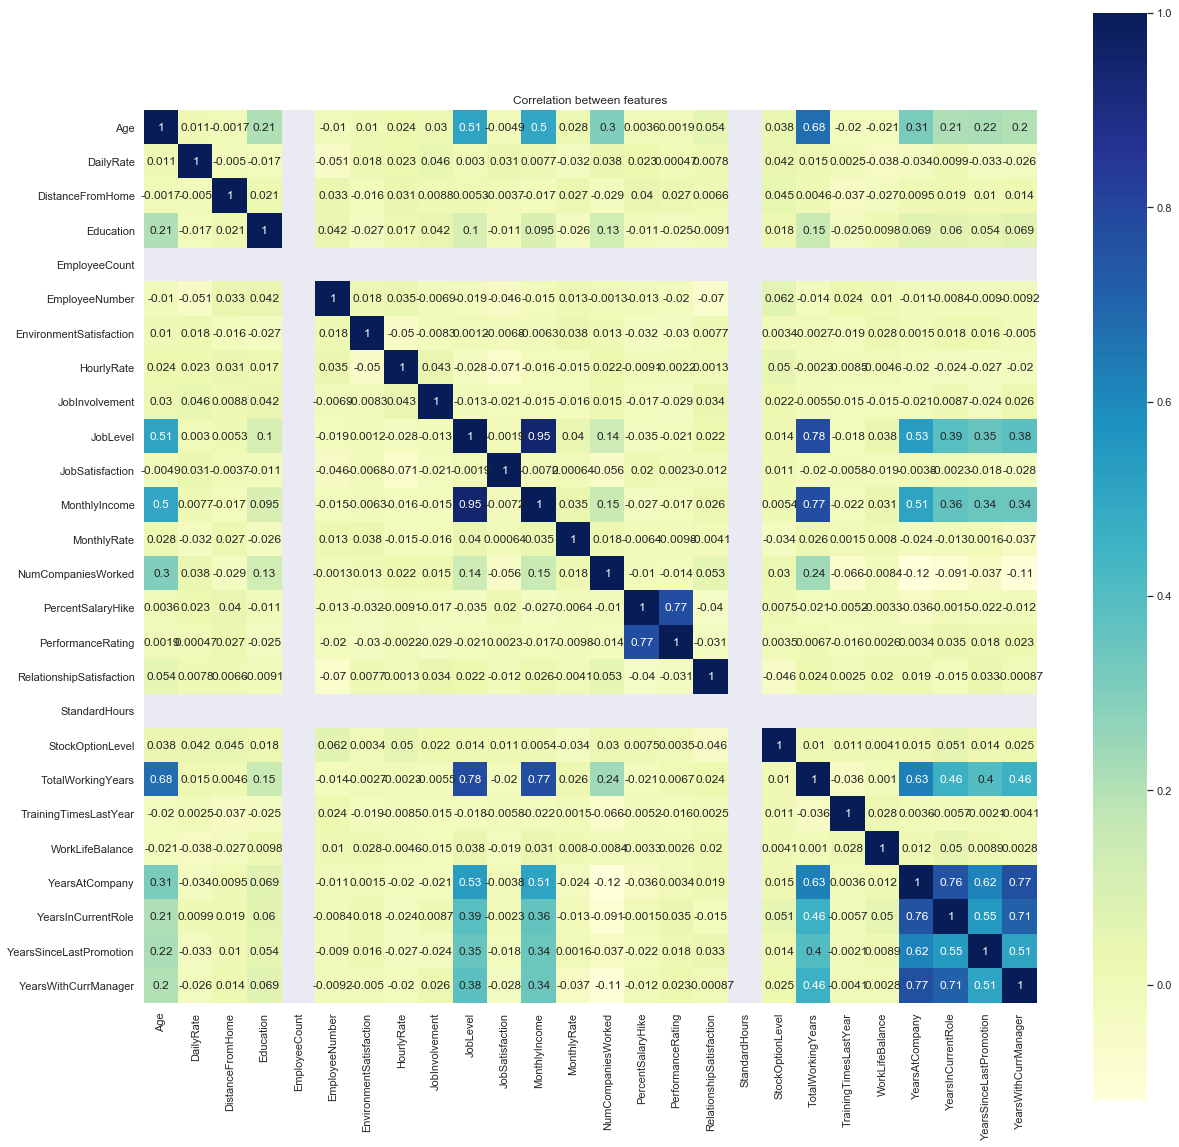

In [7]:
corr=hr.corr()

sb.set(font_scale=1)
plt.figure(figsize=(20, 20))

sb.heatmap(corr,square=True, annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

In [8]:
cat_features = list(hr.select_dtypes(include=['object']).columns)
print (len(cat_features))

cat_uniques = []
for cat in cat_features:
    cat_uniques.append(len(hr[cat].unique()))

cat_hr = pd.DataFrame.from_items([('cat_names', cat_features), ('unique_values', cat_uniques)])
cat_hr.head(9).T

9


C:\Users\pal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


,0,1,2,3,4,5,6,7,8
cat_names,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
unique_values,2,3,3,6,2,9,3,1,2


In [9]:
def plot_cat(attr,labels=None):
    sb.factorplot(data=hr,kind='count',size=3,aspect=1.5,x=attr)
        

C:\Users\pal\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pal\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


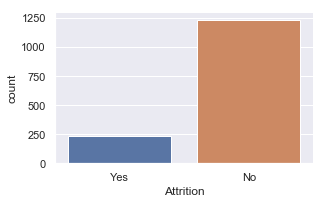

In [10]:
plot_cat('Attrition')

Data is imbalance

C:\Users\pal\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pal\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pal\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pal\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please 

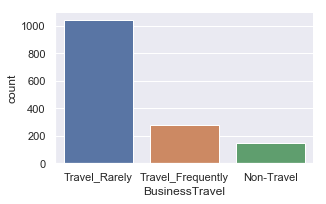

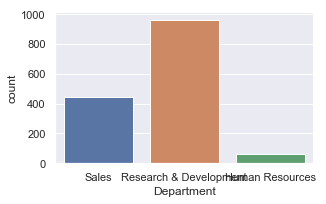

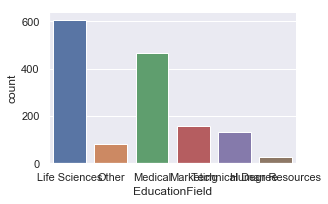

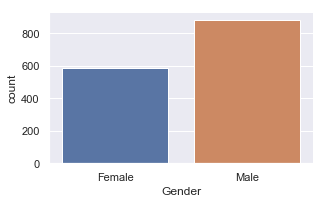

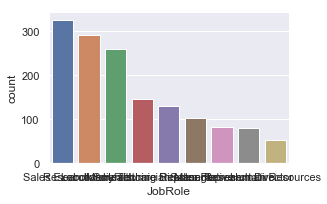

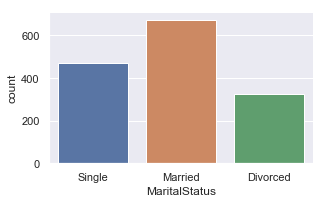

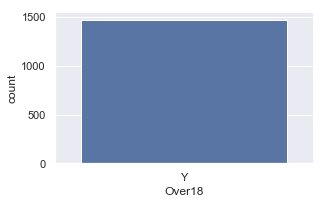

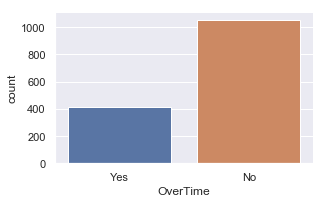

In [11]:
num_disc=['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for i in num_disc:
    plot_cat(i)


In [12]:
ic= hr.drop(['Over18'], axis=1)

C:\Users\pal\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pal\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


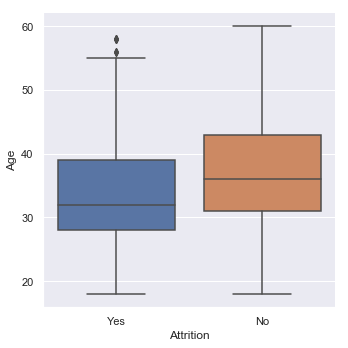

In [13]:
sb.factorplot(data=hr,y='Age',x='Attrition',size=5,aspect=1,kind='box')

In [14]:
pd.crosstab(columns=[hr.Attrition],index=[hr.BusinessTravel],margins=True,normalize='index')

Attrition,No,Yes
BusinessTravel,,
Non-Travel,0.920000,0.080000
Travel_Frequently,0.750903,0.249097
Travel_Rarely,0.850431,0.149569
All,0.838776,0.161224


In [15]:
pd.crosstab(columns=[hr.Attrition],index=[hr.EducationField],margins=True,normalize='index')

Attrition,No,Yes
EducationField,,
Human Resources,0.740741,0.259259
Life Sciences,0.853135,0.146865
Marketing,0.779874,0.220126
Medical,0.864224,0.135776
Other,0.865854,0.134146
Technical Degree,0.757576,0.242424
All,0.838776,0.161224


In [16]:
pd.crosstab(columns=[hr.Attrition],index=[hr.Department],margins=True,normalize='index')

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


In [17]:
pd.crosstab(columns=[hr.Attrition],index=[hr.Gender],margins=True,normalize='index')

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


In [18]:
pd.crosstab(columns=[hr.Attrition],index=[hr.JobRole],margins=True,normalize='index')

Attrition,No,Yes
JobRole,,
Healthcare Representative,0.931298,0.068702
Human Resources,0.769231,0.230769
Laboratory Technician,0.760618,0.239382
Manager,0.950980,0.049020
Manufacturing Director,0.931034,0.068966
Research Director,0.975000,0.025000
Research Scientist,0.839041,0.160959
Sales Executive,0.825153,0.174847
Sales Representative,0.602410,0.397590


In [19]:
pd.crosstab(columns=[hr.Attrition],index=[hr.MaritalStatus],margins=True,normalize='index')

Attrition,No,Yes
MaritalStatus,,
Divorced,0.899083,0.100917
Married,0.875186,0.124814
Single,0.744681,0.255319
All,0.838776,0.161224


In [20]:
pd.crosstab(columns=[hr.Attrition],index=[hr.OverTime],margins=True,normalize='index')

Attrition,No,Yes
OverTime,,
No,0.895636,0.104364
Yes,0.694712,0.305288
All,0.838776,0.161224


In [21]:
pd.crosstab(columns=[hr.Attrition],index=[hr.RelationshipSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


In [22]:
pd.crosstab(columns=[hr.Attrition],index=[hr.WorkLifeBalance],margins=True,normalize='index')

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


In [23]:
pd.crosstab(columns=[hr.Attrition],index=[hr.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


In [24]:
X=hr.drop('Attrition',axis=1)
y=hr['Attrition']

In [25]:
hr['Attrition'].replace("Yes",1,inplace=True)
hr['Attrition'].replace("No",0,inplace=True)

In [26]:
X=pd.get_dummies(X)

In [27]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

C:\Users\pal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 55), (294, 55), (1176,), (294,))

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, precision_score,recall_score,f1_score

In [31]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
    ]

In [32]:
classifiers_columns = []
classifiers_compare = pd.DataFrame(columns = classifiers_columns)


row_index = 0
for alg in classifiers:
    
    
    alg.fit(X_train, y_train)
    y_pred= alg.predict(X_test)
    
    classifiers_name = alg.__class__.__name__
    classifiers_compare.loc[row_index,'Name'] = classifiers_name
    classifiers_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    classifiers_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    classifiers_compare.loc[row_index, 'accuracy_score'] = accuracy_score(y_test, alg.predict(X_test))
    classifiers_compare.loc[row_index, 'f1_score'] = f1_score(y_test, alg.predict(X_test))
    classifiers_compare.loc[row_index, 'recall_score'] = recall_score(y_test, alg.predict(X_test))
    classifiers_compare.loc[row_index, 'precision_score'] = precision_score(y_test, alg.predict(X_test))




    row_index+=1
    
classifiers_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
classifiers_compare

C:\Users\pal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\pal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Name,Train Accuracy,Test Accuracy,accuracy_score,f1_score,recall_score,precision_score
0,LogisticRegression,0.8852,0.8741,0.874150,0.506667,0.387755,0.730769
5,XGBClassifier,0.9413,0.8707,0.870748,0.424242,0.285714,0.823529
2,SVC,0.9039,0.8673,0.867347,0.338983,0.204082,1.000000
4,RandomForestClassifier,0.9855,0.8605,0.860544,0.327869,0.204082,0.833333
1,KNeighborsClassifier,0.8750,0.8401,0.840136,0.203390,0.122449,0.600000
3,DecisionTreeClassifier,1.0000,0.7823,0.782313,0.333333,0.326531,0.340426


In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)
fit = lr.fit(X_train, y_train)

print('\n Percentage accuracy training set')
print(lr.score(X_train, y_train))

print('\n Percentage accuracy testing set')
print(lr.score(X_test, y_test))

pred_y_sklearn = lr.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))

Coefficients
         0         1         2         3    4         5         6        7   \
0 -0.329621 -0.154071  0.291186  0.039724  0.0 -0.085113 -0.498381 -0.03797   

         8         9   ...        45        46       47        48        49  \
0 -0.357389 -0.282375  ... -0.669582 -0.170237 -0.00808  0.201823 -0.165866   

         50        51   52        53        54  
0 -0.079209  0.232531  0.0 -0.415593  0.415593  

[1 rows x 55 columns]

Intercept:[-2.73109057]

 Percentage accuracy training set
0.8877551020408163

 Percentage accuracy testing set
0.8673469387755102

 Accuracy City Safety on Test Set
Attrition    0   1
row_0             
0          237  31
1            8  18


C:\Users\pal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Ridge Logistic Regression

In [38]:
ridge = LogisticRegression(penalty ='l2')
fit = ridge.fit(X_train, y_train)

print('\n Percentage accuracy training set')
print(ridge.score(X_train, y_train))

print('\n Percentage accuracy testing set')
print(ridge.score(X_test, y_test))

pred_y_sklearn = ridge.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))


 Percentage accuracy training set
0.8852040816326531

 Percentage accuracy testing set
0.8741496598639455

 Accuracy City Safety on Test Set
Attrition    0   1
row_0             
0          238  30
1            7  19


C:\Users\pal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Lasso Logistic Regression

In [39]:
lasso = LogisticRegression(penalty ='l1')
fit = lasso.fit(X_train, y_train)

print('\n Percentage accuracy training set')
print(lasso.score(X_train, y_train))

print('\n Percentage accuracy testing set')
print(lasso.score(X_test, y_test))

pred_y_sklearn = lasso.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))


 Percentage accuracy training set
0.8886054421768708

 Percentage accuracy testing set
0.8775510204081632

 Accuracy City Safety on Test Set
Attrition    0   1
row_0             
0          239  30
1            6  19


C:\Users\pal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
